In [2]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [3]:
groups = ['healthy', 'parkinson']
categories = ['testing','training']
im_types = ['spiral','wave']


cwd = os.getcwd()

base_dir = os.path.join(cwd, 'parkinsons-drawings')

# Walk through the image directory
# Read in images as grayscale and resave
for root, dirs, files in os.walk(base_dir):
    for name in files:
        image = cv2.imread(os.path.join(root, name), 0)
        cv2.imwrite(os.path.join(root,name), image)

In [4]:

# Walk through image directory
# Rescale all spiral drawings to 256x256 and all wave to 256x128 for 
# consistent size to be used as features
for im_type in im_types:
    direc = os.path.join(base_dir, im_type)
    if im_type == 'spiral':
        imsize = (256,256)
    else:
        imsize = (256,128)
    for root, dirs, files in os.walk(direc):
        for name in files:
            image = cv2.imread(os.path.join(root,name),0)
            resized = cv2.resize(image, imsize)
            cv2.imwrite(os.path.join(root,name), resized)
            

In [19]:

def pickleData():
    
    # Create lists of dictionaries for each image type
    spiral_training = []
    direc = os.path.join(base_dir, 'spiral', 'training')

    for root, dirs, files in os.walk(direc, followlinks=False):
        for name in files:
            image = cv2.imread(os.path.join(root,name),0)
            label = name[3]
            tdict = {'Desc': 'Spiral', 'Label': label, 'Image': image.flatten()}
            spiral_training.append(tdict)
    
    spiral_testing = []
    direc = os.path.join(base_dir, 'spiral', 'testing')

    for root, dirs, files in os.walk(direc, followlinks=False):
        for name in files:
            image = cv2.imread(os.path.join(root,name),0)
            label = name[3]
            tdict = {'Desc': 'Spiral', 'Label': label, 'Image': image.flatten()}
            spiral_testing.append(tdict)  

    wave_training = []
    direc = os.path.join(base_dir, 'wave', 'training')

    for root, dirs, files in os.walk(direc, followlinks=False):
        for name in files:
            image = cv2.imread(os.path.join(root,name),0)
            label = name[3]
            tdict = {'Desc': 'Wave', 'Label': label, 'Image': image.flatten()}
            wave_training.append(tdict)   
        
    wave_testing = []
    direc = os.path.join(base_dir, 'wave', 'testing')

    for root, dirs, files in os.walk(direc, followlinks=False):
        for name in files:
            image = cv2.imread(os.path.join(root,name),0)
            label = name[3]
            tdict = {'Desc': 'Wave', 'Label': label, 'Image': image.flatten()}
            wave_testing.append(tdict)    

    # Pickle datasets
    pickle.dump(spiral_training, open('spiral_training.p','wb'))
    pickle.dump(spiral_testing, open('spiral_testing.p','wb'))
    pickle.dump(wave_training, open('wave_training.p','wb'))
    pickle.dump(wave_testing, open('wave_testing.p','wb'))

    
def unpickleData():
    spiral_training = pickle.load(open('spiral_training.p','rb'))
    spiral_testing = pickle.load(open('spiral_testing.p','rb'))
    wave_training = pickle.load(open('wave_training.p','rb'))
    wave_testing = pickle.load(open('wave_testing.p','rb'))
    return spiral_training, spiral_testing, wave_training, wave_testing

In [20]:
spiral_training, spiral_testing, wave_training, wave_testing = unpickleData()


In [22]:
def extractXy(mylist):
    X = []
    y = []
    for entry in mylist:
        X.append(entry.get("Image"))
        y.append(entry.get("Label"))
    return X, y

In [23]:
Xspiral, yspiral = extractXy(spiral_training)
print(yspiral)

['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']


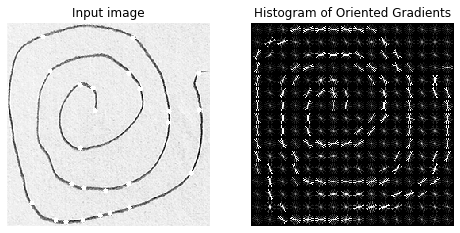

(16, 16, 1, 1, 8)


In [30]:
from skimage.feature import hog
from skimage import exposure

fd, hog_image = hog(healthy,orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False, feature_vector=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(healthy, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

print(np.shape(fd))